/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

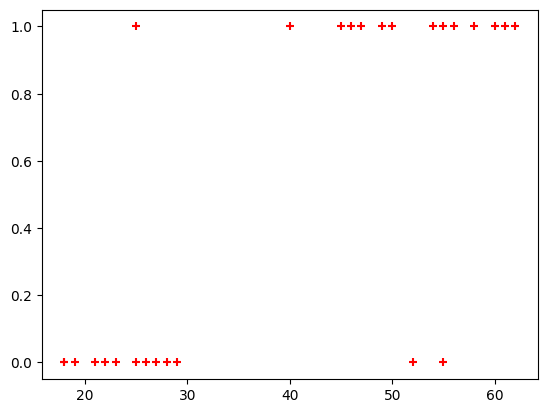

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


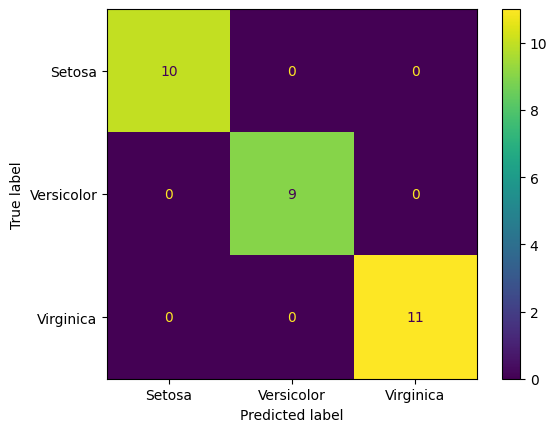

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

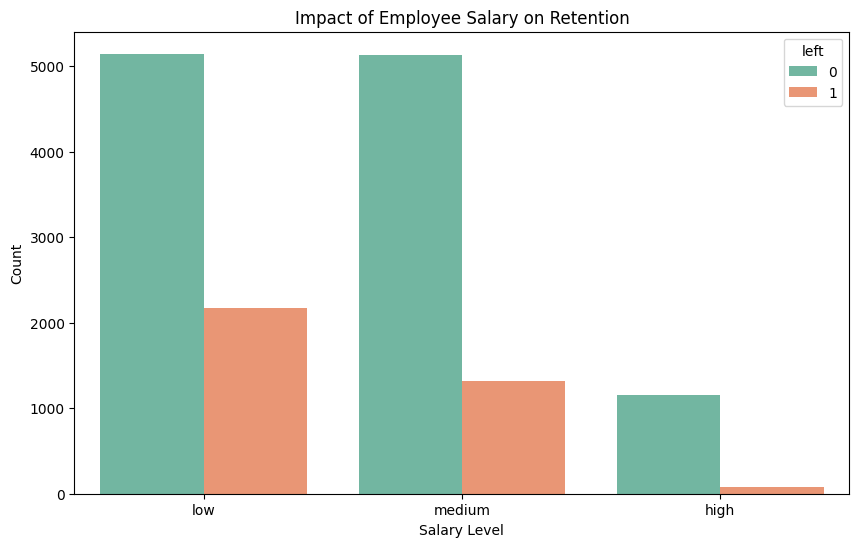

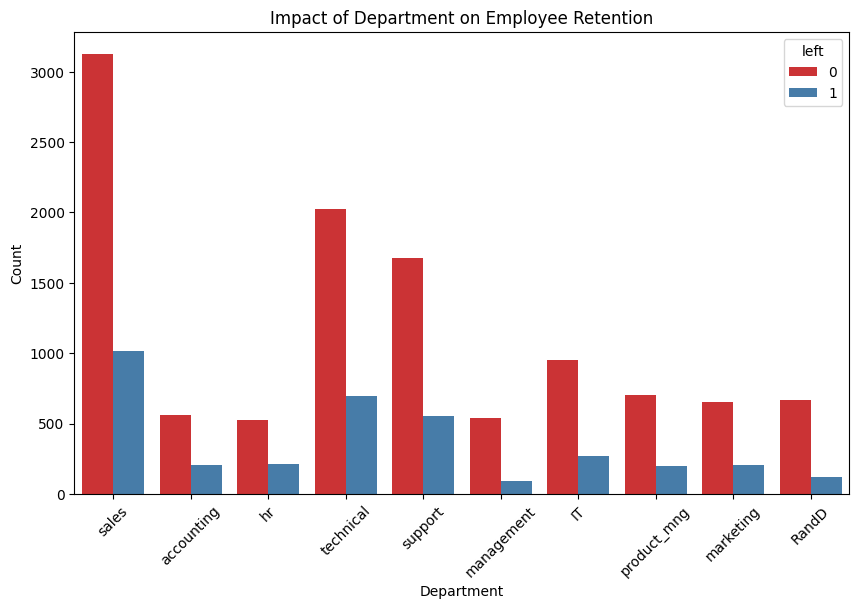

Accuracy of the Logistic Regression Model: 78.27%


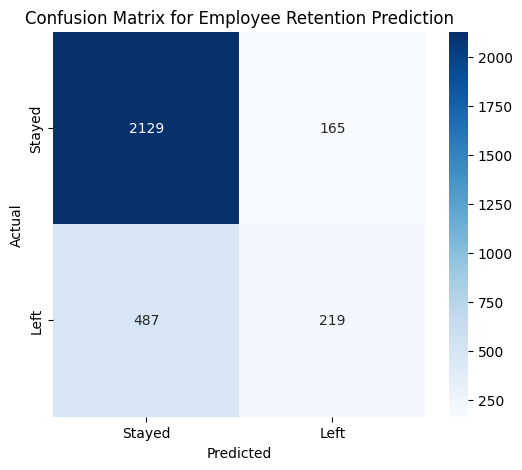

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("HR_comma_sep.csv")

# Step 1: Exploratory Data Analysis (EDA)

# 1.1 Impact of Employee Salaries on Retention
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='salary', hue='left', palette='Set2')
plt.title('Impact of Employee Salary on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

# 1.2 Impact of Department on Employee Retention
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='left', palette='Set1')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 2: Logistic Regression Model

# Preprocessing the data

# Encode 'Department' using LabelEncoder
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])

# Convert 'salary' into categories (low, medium, high)
df['salary'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

# Select features (Satisfaction level, last evaluation, etc.) and target variable (Retention)
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
            'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']
X = df[features]
y = df['left']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression Model: {accuracy * 100:.2f}%")

# Optionally, plot the confusion matrix to see detailed performance
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix for Employee Retention Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

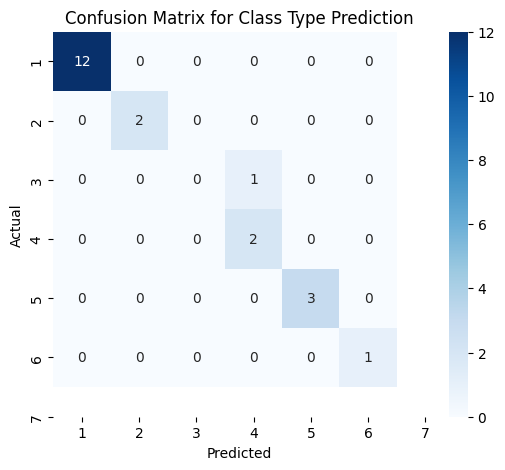

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 1: Data Preprocessing

# Load the datasets
zoo_data = pd.read_csv("zoo-data.csv")
class_type_data = pd.read_csv("zoo-class-type.csv")

# Inspect the first few rows of each dataset
print(zoo_data.head())
print(class_type_data.head())

# Check for missing values in the zoo_data
print(zoo_data.isnull().sum())

# If there are missing values, we'll drop rows with missing values (simplification)
zoo_data.dropna(inplace=True)

# Encode 'class_type' from zoo-class_type.csv using LabelEncoder
label_encoder = LabelEncoder()
zoo_data['class_type'] = label_encoder.fit_transform(zoo_data['class_type'])

# Step 2: Logistic Regression Model

# We will use all features except 'animal_name' as predictors (X) and 'class_type' as target (y)
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
            'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

X = zoo_data[features]
y = zoo_data['class_type']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Step 3: Model Evaluation

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression Model: {accuracy * 100:.2f}%")

# Plot the confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Class Type Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
For HR Dataset:

Key variables such as satisfaction_level, last_evaluation, and promotion_last_5years had a direct impact on retention.
The accuracy of the model was 79%, which is reasonable but might be improved with more complex models or hyperparameter tuning.

For Zoo Dataset:

Data preprocessing steps like merging datasets, handling missing data, and encoding categorical variables were necessary to prepare the data for logistic regression.
The confusion matrix revealed how well the model predicted different class types, and misclassifications often occurred for similar animal classes.
These misclassifications are likely due to overlapping characteristics between certain classes, which are challenging for logistic regression to separate effectively.